<a href="https://colab.research.google.com/github/antontregub/labs/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('winequality_white.csv')
df = df.replace('?', np.NaN)

In [32]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [33]:
df.shape

(4898, 12)

Task 2

In [34]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:

df['fixed acidity'] = pd.Categorical(df['fixed acidity'])
df['volatile acidity'] = pd.Categorical(df['volatile acidity'])
df['citric acid'] = pd.Categorical(df['citric acid'])
df['residual sugar'] = pd.Categorical(df['residual sugar'])
df['chlorides'] = pd.Categorical(df['chlorides'])
df['free sulfur dioxide'] = pd.Categorical(df['free sulfur dioxide'])
df['total sulfur dioxide'] = pd.Categorical(df['total sulfur dioxide'])
df['density'] = pd.Categorical(df['density'])
df['pH'] = pd.Categorical(df['pH'])
df['alcohol'] = pd.Categorical(df['alcohol'])
df['quality'] = pd.Categorical(df['quality'])

Task 3

In [38]:
df_for_viz = df.copy()
for column in df_for_viz.select_dtypes(include='category').columns:
    df_for_viz[column] = df_for_viz[column].cat.codes

All-vs-All correlation

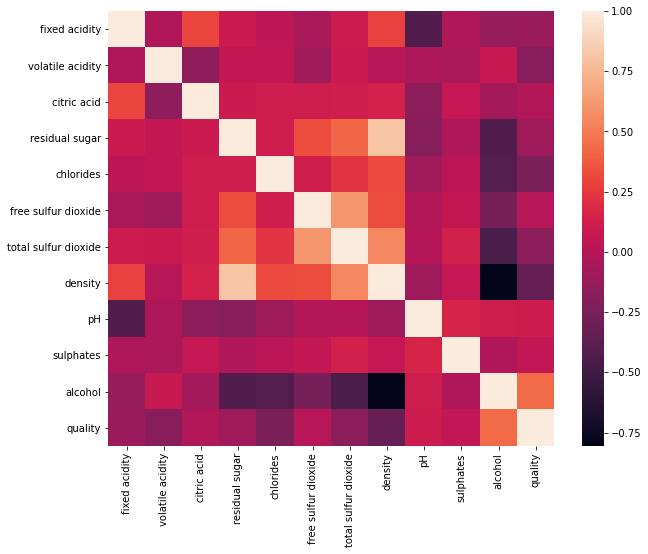

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_for_viz.corr())



```
# Distribution plots
```



In [18]:
df1 = pd.read_csv('winequality_white.csv')
df1 = df1.replace('?', np.NaN)
df1['fixed acidity'] = pd.Categorical(df1['fixed acidity']).as_ordered()
df1['volatile acidity'] = pd.Categorical(df1['volatile acidity']).as_ordered()
df1['citric acid'] = pd.Categorical(df1['citric acid']).as_ordered()
df1['residual sugar'] = pd.Categorical(df1['residual sugar']).as_ordered()
df1['chlorides'] = pd.Categorical(df1['chlorides']).as_ordered()
df1['free sulfur dioxide'] = pd.Categorical(df1['free sulfur dioxide']).as_ordered()
df1['total sulfur dioxide'] = pd.Categorical(df1['total sulfur dioxide']).as_ordered()
#df1['density'] = pd.Categorical(df1['density']).as_ordered()
#df1['pH'] = pd.Categorical(df1['pH']).as_ordered()
df1['alcohol'] = pd.Categorical(df1['alcohol']).as_ordered()
df1['quality'] = pd.Categorical(df1['quality']).as_ordered()



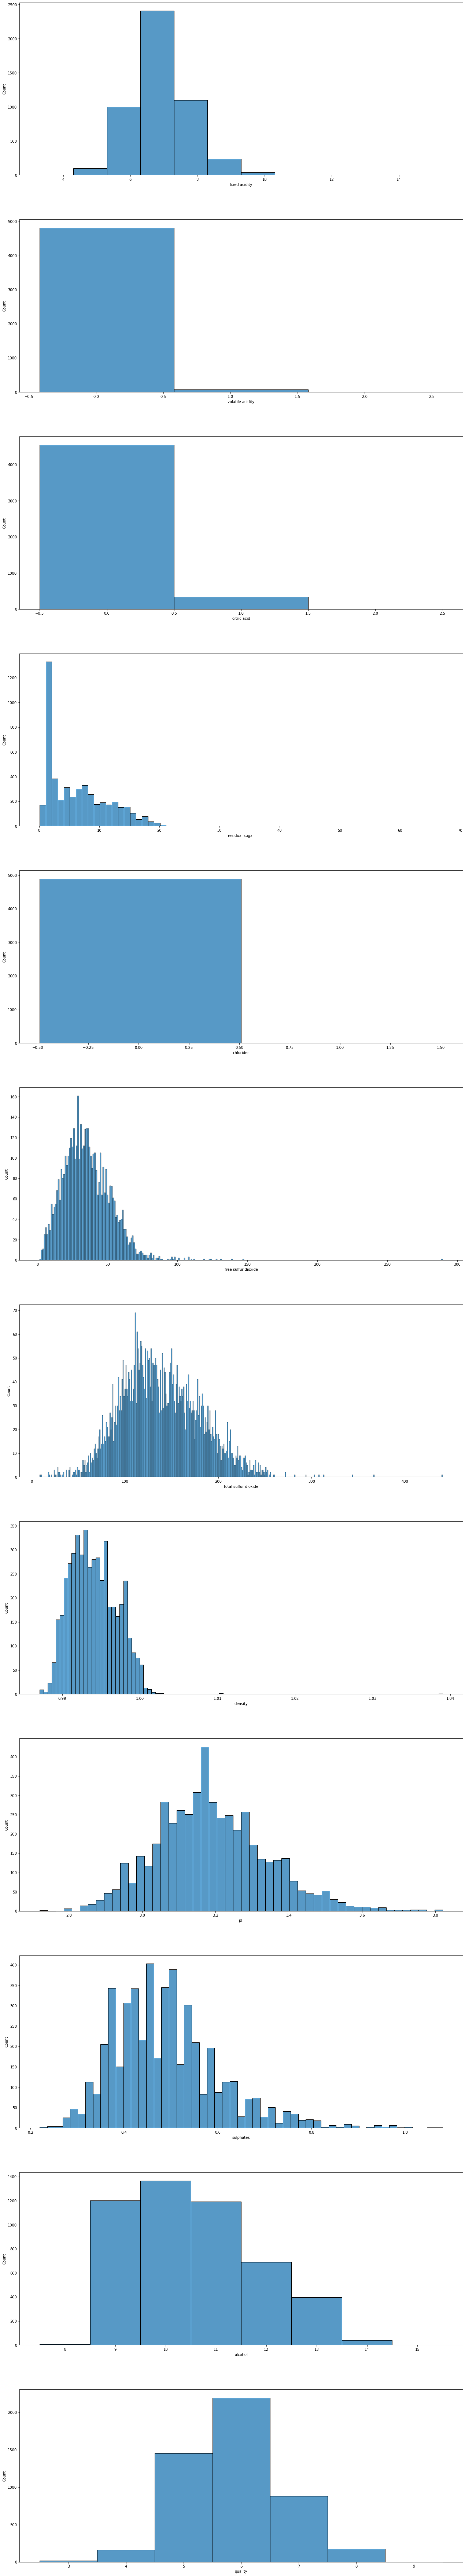

In [19]:
fig, axes = plt.subplots(nrows=12, ncols=1,figsize=(20,100))
fig.tight_layout(pad=10.0)
ax_iter = iter(axes.flat)
for column in df1.columns:
    ax = next(ax_iter)
    a = sns.histplot(df1[column],ax=ax)

Boxplots conditioned on label

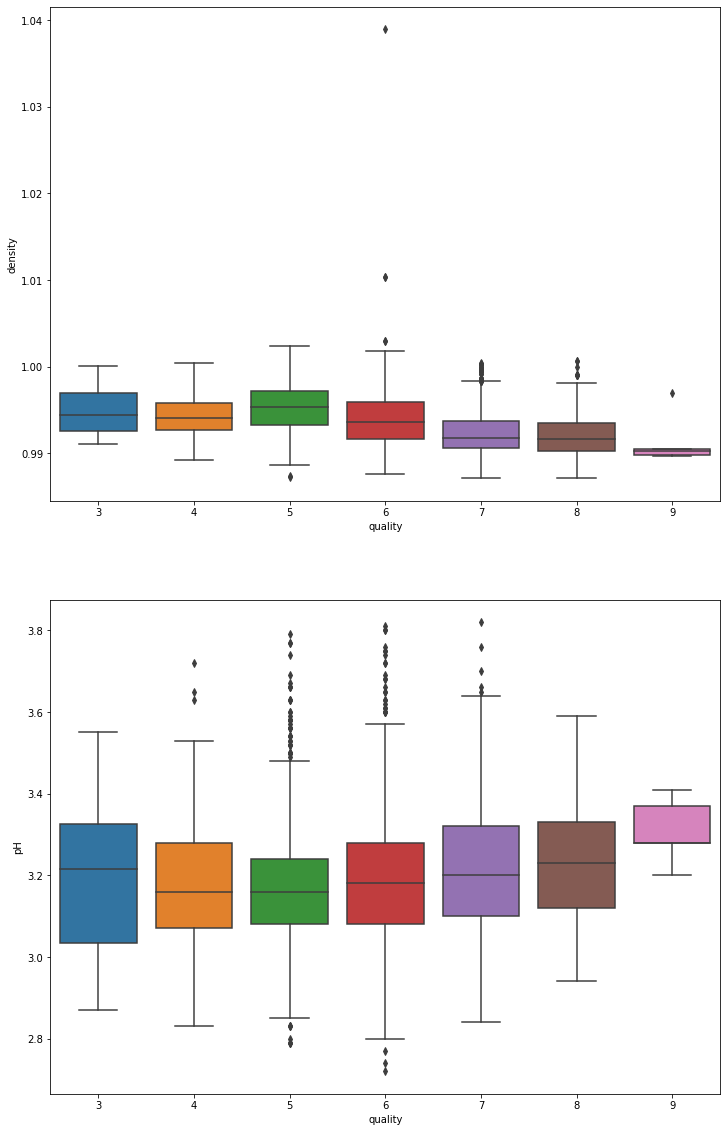

In [20]:
df=df.head()
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12,20))
ax_iter = iter(axes.flat)
for column in [ 'density', 'pH']:
    ax = next(ax_iter)
    a = sns.boxplot(x='quality', y=column, data=df1,ax=ax)

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

One-Hot encoding

In [41]:
for column in df.select_dtypes(include='category').columns:
    if column=='quality':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality',axis=1), df['quality'].cat.codes, test_size=0.2, random_state=42)

Numerical features scaling

In [43]:
for column in df.select_dtypes(include='int64').columns:
    scale = StandardScaler().fit(X_train[[column]])
    X_train[[column]] = scale.transform(X_train[[column]])
    X_test[[column]] = scale.transform(X_test[[column]])

KNN

In [44]:
n_neighbors = list(range(10,15))
hyperparameters = dict(n_neighbors=n_neighbors)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.1min finished


Best n_neighbors: 11


In [46]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [47]:
knn.score(X_test, y_test)

0.4806122448979592

In [48]:
f1_score(y_test, y_pred, average='weighted')

0.4555250721031324

Decision Tree

In [49]:
max_depth = [None,5,10,15]
hyperparameters = dict(max_depth=max_depth)
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, hyperparameters, cv=3, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.6s finished


Best max_depth: None


In [50]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print('Score:', dtc.score(X_test, y_test))
print(f1_score(y_test, y_pred, average='weighted'))

Score: 0.4969387755102041
0.4322499259309392


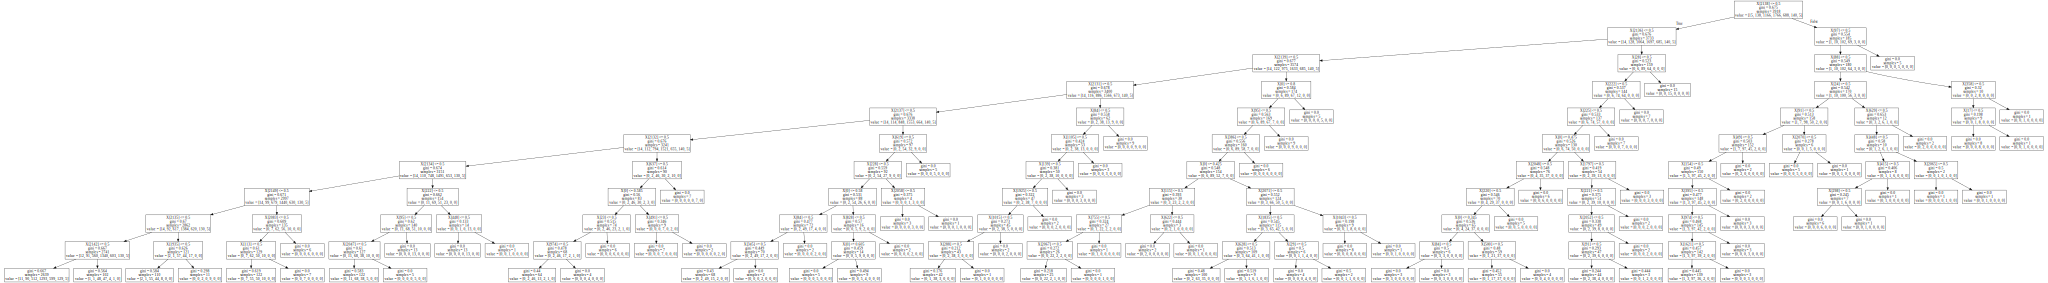

In [51]:
import graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                                filled=False)
graph = graphviz.Source(dot_data, format="png") 
graph

In [52]:
X_train.columns

Index(['sulphates', 'fixed acidity_3.8', 'fixed acidity_3.9',
       'fixed acidity_4.2', 'fixed acidity_4.4', 'fixed acidity_4.5',
       'fixed acidity_4.6', 'fixed acidity_4.7', 'fixed acidity_4.8',
       'fixed acidity_4.9',
       ...
       'alcohol_13.4', 'alcohol_13.5', 'alcohol_13.55', 'alcohol_13.6',
       'alcohol_13.7', 'alcohol_13.8', 'alcohol_13.9', 'alcohol_14.0',
       'alcohol_14.05', 'alcohol_14.2'],
      dtype='object', length=2230)

SVM

In [53]:
c = [0.1, 1, 2]
gamma = [0.1, 0.5]
kernel = ['rbf']
hyperparameters = dict(C=c, gamma=gamma, kernel=kernel)
svc = SVC()
clf = GridSearchCV(svc, hyperparameters, cv=2, n_jobs=-1, verbose=10)
best_model = clf.fit(X_train,y_train)
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.0min finished


Best C: 2
Best gamma: 0.1
Best kernel: rbf


In [54]:
svc = SVC(C=2, kernel='rbf', gamma=0.1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [55]:
svc.score(X_test, y_test)

0.6428571428571429

In [56]:
f1_score(y_test, y_pred, average='weighted')

0.6289399922042163

Best - SVM

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.04      0.08        25
           2       0.67      0.65      0.66       291
           3       0.61      0.77      0.68       432
           4       0.70      0.47      0.57       192
           5       1.00      0.40      0.57        35

    accuracy                           0.64       980
   macro avg       0.66      0.39      0.43       980
weighted avg       0.66      0.64      0.63       980



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   1   4   0   0]
 [  0   1  11  13   0   0]
 [  0   0 190  96   5   0]
 [  0   0  72 334  26   0]
 [  0   0   8  93  91   0]
 [  0   0   1  12   8  14]]
